In [1]:
{-# LANGUAGE FlexibleContexts, MonadComprehensions, NoImplicitPrelude, RebindableSyntax, TypeFamilies #-}
import Language.Stochaskell
stochaskell

Stochaskell, version 0.1.0
Copyright (C) 2015-2020 David A Roberts
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under certain conditions; see the LICENSE for details.

Using installation directory at 
  /home/jovyan/stochaskell

In [2]:
import IHaskell.Display

let v_0_0 = sin a :: R
    v_0_1 = 4.2 + v_0_0 :: R
 in v_0_1

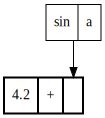

In [3]:
let z = 4.2 + sin (symbol "a")
print z
svg <$> vizIR (return z)

In [4]:
import Language.Graphviz

/*
let v_0_0 = 
      [ let v_1_0 = 2 * i_1_1 :: Z
            v_1_1 = 1 + v_1_0 :: Z
         in v_1_1
      | i_1_1 <- 1...n ] :: ZVec
    v_0_1 = 
      [ let v_1_0 = i_1_1 - i_1_2 :: Z
            v_1_1 = v_1_0 * v_1_0 :: Z
         in v_1_1
      | i_1_1 <- 1...n, i_1_2 <- 1...k ] :: ZMat
    v_0_2 = getExternal x_ns_0_0 :: Array 1...n R
 in do x_ns_0_0 <- 
         [ normal i_1_1 1.0 :: P R
         | i_1_1 <- 1...n ] :: Array 1...n R
       return [v_0_0,v_0_1,x_ns_0_0]
*/

digraph {
  compound="true"
  subgraph cluster_array__v_0_0 {
    label="array"
    _v_0_0_i_1_1 [shape="record" label="index 1|1|n"]
    
    _v_0_0_v_1_0 [shape="record" label="2|*|<f2>"]
    
    _v_0_0 [shape="record" label="1|+|<f2>"]
    
    
    _v_0_0 [style="bold"]
  }
  
  subgraph cluster_array__v_0_1 {
    label="array"
    _v_0_1_i_1_1 [shape="record" label="index 1|1|n"]
    _v_0_1_i_1_2 [shape="record" label="index 2|1|k"]
    
    _v_0_1_v_1_0 [shape="record" label="<f1>|-|<f2>"]
    
    _v_

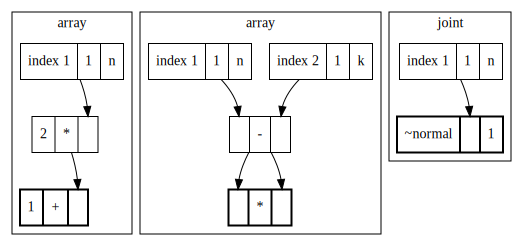

In [5]:
p :: P (ZVec,ZMat,RMat)
p = do
  let n = symbol "n"
      k = symbol "k"
      v = vector [ 2*i + 1 | i <- 1...n ]
      m = matrix [ (i-j)^2 | i <- 1...n, j <- 1...k ]
  z <- joint matrix [ normal (cast i) 1 | i <- 1...n ]
  return (v,m,z)
putStrLn $ graphviz p
svg <$> vizIR p

In [6]:
prior :: P (Z,RVec,RVec)
prior = do
  n <- poisson 5
  let base = uniform 0 5
  x <- orderedSample n base
  let mu = vector [ 0 | i <- 1...n ]
      kernel a b = exp (-(a - b)^2 / 2) + if a == b then 1e-6 else 0
      cov = matrix [ kernel (x!i) (x!j) | i <- 1...n, j <- 1...n ]
  y <- normal mu cov
  return (n,x,y)

In [7]:
let posterior = [ y | (n,x,y) <- prior, n == 5, x == list [0.5,1.5,2.5,3.5,4.5] ]

/*
let v_0_0 = getExternal x_ns_0_0 :: Z
    v_0_1 = 
      [ 0.0
      | i_1_1 <- 1...x_ns_0_0 ] :: RVec
    v_0_2 = getExternal x_ns_0_1 :: Array 1...x_ns_0_0 R
    v_0_3 = 
      [ let v_1_0 = id x_ns_0_1!i_1_1 :: R
            v_1_1 = id x_ns_0_1!i_1_2 :: R
            v_1_2 = v_1_0 - v_1_1 :: R
            v_1_3 = v_1_2 * v_1_2 :: R
            v_1_4 = v_1_3 / 2.0 :: R
            v_1_5 = negate v_1_4 :: R
            v_1_6 = exp v_1_5 :: R
            v_1_7 = v_1_0 == v_1_1 :: B
            v_1_8 = ifThenElse v_1_7 1.0e-6 0.0 :: R
            v_1_9 = v_1_6 + v_1_8 :: R
         in v_1_9
      | i_1_1 <- 1...x_ns_0_0, i_1_2 <- 1...x_ns_0_0 ] :: RMat
    v_0_4 = getExternal x_ns_0_2 :: RVec
 in do x_ns_0_0 <- poisson 5.0 :: P Z
       x_ns_0_1 <- orderedSample (uniform 0.0 5.0 :: P R) x_ns_0_0 :: P Array 1...x_ns_0_0 R
       x_ns_0_2 <- multi_normal v_0_1 v_0_3 :: P RVec
       return [x_ns_0_2]
*/

digraph {
  compound="true"
  
  
  subgraph cluster_array__v_0_1 {
    label="arr

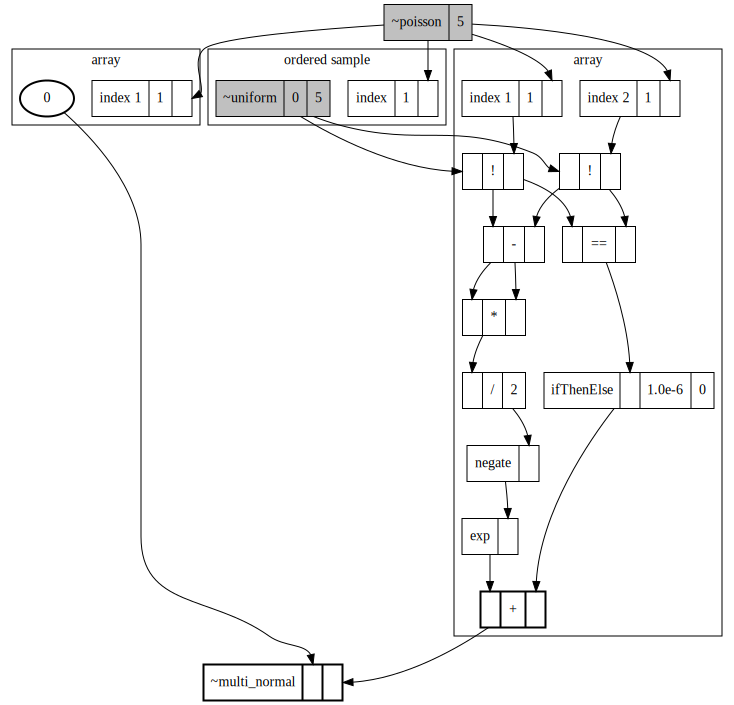

In [8]:
putStrLn $ graphviz posterior
svg <$> vizIR posterior